In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
from Bio import Phylo

In [2]:
from itertools import chain
dataset = "Data"

all_outputs_path = pathlib.Path(pathlib.Path.home(),dataset).resolve()
# all_outputs_path = chain(all_outputs_path.glob("*Primates*"),all_outputs_path.glob("*Rodent*"))

all_outputs_path = list(all_outputs_path.iterdir())



In [3]:
# all_outputs_path = pathlib.Path("../all_outputs/results_rerun",dataset).resolve()
all_outputs_path = [folder for folder in all_outputs_path if (folder / "epsilon.csv").exists()]


# sum_branches = []
# filtered_outputs_path = []
# for dir_name in all_outputs_path:
#     tree_path = (dir_name / f"{dir_name.stem}_NT.tree").resolve()
#     tree = Phylo.read(tree_path, 'newick')
#     sum_branch_lengths = tree.total_branch_length()
#     if sum_branch_lengths > 7:
#         sum_branches.append(sum_branch_lengths)
#         filtered_outputs_path.append(dir_name)

# all_outputs_path = filtered_outputs_path

abc_winner = []
duplicate_count = 0
for dir_name in all_outputs_path:
    epsilon_results = pathlib.Path(dir_name, "epsilon.csv")
    temp_df = pd.read_csv(epsilon_results, index_col=0)
    temp_df = temp_df.fillna(0.0).astype('float')
    def get_max(x):
        sorted_x = x.sort_values(ascending=False)
        if len(sorted_x) == 1 or sorted_x[0] > sorted_x[1]:
            return sorted_x.index[0]
        if len(sorted_x) == 2 or sorted_x[1] > sorted_x[2]:
            return ",".join(sorted(sorted_x.index[:2]))
        return ",".join(sorted_x.index)
    abc_winner.append(temp_df.apply(get_max, axis=0))

In [4]:
new_df  = pd.concat(abc_winner, axis=1)
new_df.columns = [i.stem for i in all_outputs_path]
new_df

,ENSG00000180305_WFDC10A,ENSG00000002933_TMEM176A,Bacillus_1ZARG,ENSG00000283758_PMIS2,ENSG00000005007_UPF1
10,poisson,geometric,zipf,geometric,zipf
25,poisson,geometric,zipf,geometric,zipf
50,poisson,geometric,zipf,geometric,zipf
100,poisson,geometric,zipf,geometric,zipf
250,poisson,geometric,zipf,geometric,zipf
500,poisson,geometric,zipf,geometric,zipf
1000,poisson,geometric,zipf,geometric,zipf


In [5]:
summary_res = new_df.apply(lambda x: x.value_counts(), axis=1)
summary_res = summary_res.fillna(0)
summary_res


,geometric,zipf,poisson
10,2,2,1
25,2,2,1
50,2,2,1
100,2,2,1
250,2,2,1
500,2,2,1
1000,2,2,1


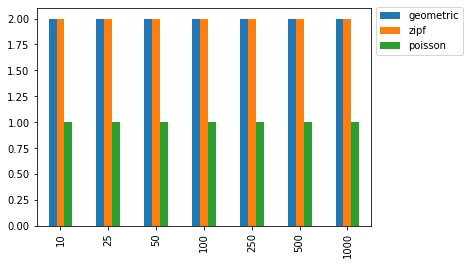

In [6]:
# summary_res.to_csv(f"true_epsilon_summary_{dataset}.csv")
ax = summary_res.plot(kind="bar")
ax.legend(bbox_to_anchor=(1.00, 1.03))
plt.show()
# plt.savefig(f"true_epsilon_summary_{dataset}.png", bbox_inches="tight", dpi=200)